# Reproducibility Study of “Studying How to Efficiently and Effectively Guide Models with Explanations”

Description: This file is part of a project aiming to reproduce the study titled "Studying How to Efficiently and 
Effectively Guide Models with Explanations." The project focuses on verifying the results and methodologies 
proposed in the original study, and potentially extending or refining the study's findings.

Based on the code of orginal paper: https://github.com/sukrutrao/Model-Guidance

### 1. Load the data

In [1]:
import sys
import argparse

sys.path.append('datasets/VOC2007/')

from preprocess import main


data_root = "datasets/VOC2007/"
split = "train"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

main(args)

Using downloaded and verified file: datasets/VOC2007/VOCtrainval_06-Nov-2007.tar
Extracting datasets/VOC2007/VOCtrainval_06-Nov-2007.tar to datasets/VOC2007/


100%|██████████| 2501/2501 [00:09<00:00, 269.77it/s]


In [2]:
import sys
import argparse

sys.path.append('datasets/VOC2007/')

from preprocess import main

data_root = "datasets/VOC2007/"
split = "val"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

main(args)

Using downloaded and verified file: datasets/VOC2007/VOCtrainval_06-Nov-2007.tar
Extracting datasets/VOC2007/VOCtrainval_06-Nov-2007.tar to datasets/VOC2007/


100%|██████████| 2510/2510 [00:09<00:00, 273.15it/s]


In [3]:
import sys
import argparse

sys.path.append('datasets/VOC2007/')

from preprocess import main

data_root = "datasets/VOC2007/"
split = "test"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

main(args)

Using downloaded and verified file: datasets/VOC2007/VOCtest_06-Nov-2007.tar
Extracting datasets/VOC2007/VOCtest_06-Nov-2007.tar to datasets/VOC2007/


100%|██████████| 4952/4952 [00:16<00:00, 299.38it/s]


### 2. Train the baseline model

Train the baseline model using the training data for 2 epochs and a batch size of 16

In [4]:
import argparse

from train import main

model_backbone = "vanilla"
total_epochs = 2
learning_rate = 1e-4
log_path = "./base_logs_demo"
save_path = "./BASE_DEMO"
train_batch_size = 16
dataset = "VOC2007"

# Default values
seed = 0
model_path = None
data_path = "datasets/"
localization_loss_lambda = 1.0
layer = "Input"
localization_loss_fn = None
attribution_method = None
optimize_explanations = False
min_fscore = -1
pareto = False
annotated_fraction = 1.0
evaluation_frequency = 1
eval_batch_size = 4
box_dilation_percentage = 0
pareto_metric = "EPG_IOU"

args = {
    "model_backbone": model_backbone,
    "total_epochs": total_epochs,
    "learning_rate": learning_rate,
    "log_path": log_path,
    "save_path": save_path,
    "seed": seed,
    "train_batch_size": train_batch_size,
    "dataset": dataset,
    "model_path": model_path,
    "data_path": data_path,
    "localization_loss_lambda": localization_loss_lambda,
    "layer": layer,
    "localization_loss_fn": localization_loss_fn,
    "attribution_method": attribution_method,
    "optimize_explanations": optimize_explanations,
    "min_fscore": min_fscore,
    "pareto": pareto,
    "annotated_fraction": annotated_fraction,
    "evaluation_frequency": evaluation_frequency,
    "eval_batch_size": eval_batch_size,
    "box_dilation_percentage": box_dilation_percentage,
    "pareto_metric": pareto_metric
}

args = argparse.Namespace(**args)

main(args)

2024-01-30 21:13:35.680487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 21:13:36.904969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Train data size: 2501
Annotated: 2501, Total: 2501


  0%|          | 0/2 [00:00<?, ?it/s]/home/roan/anaconda3/envs/FACTifAI/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 157/157 [03:03<00:00,  1.17s/it]


Epoch: 0, Average Loss: 0.18018922209739685


 50%|█████     | 1/2 [04:09<04:09, 249.35s/it]

Validation Metrics: {'Accuracy': 0.9646015763282776, 'Precision': 0.8535202145576477, 'Recall': 0.6565708518028259, 'F-Score': 0.7422022223472595, 'True Positives': 2558.0, 'True Negatives': 45865.0, 'False Positives': 439.0, 'False Negatives': 1338.0, 'Average-Loss': 0.10070029330918513}


100%|██████████| 157/157 [00:57<00:00,  2.74it/s]


Epoch: 1, Average Loss: 0.08310269564390182


100%|██████████| 2/2 [05:21<00:00, 160.82s/it]


Validation Metrics: {'Accuracy': 0.96687251329422, 'Precision': 0.8321927785873413, 'Recall': 0.7179158329963684, 'F-Score': 0.7708419561386108, 'True Positives': 2797.0, 'True Negatives': 45740.0, 'False Positives': 564.0, 'False Negatives': 1099.0, 'Average-Loss': 0.09283216256069472}


100%|██████████| 1238/1238 [00:30<00:00, 41.09it/s]


Validation Metrics: {'Accuracy': 0.9677504301071167, 'Precision': 0.8356019258499146, 'Recall': 0.7239255905151367, 'F-Score': 0.7757652401924133, 'True Positives': 5525.0, 'True Negatives': 90321.0, 'False Positives': 1087.0, 'False Negatives': 2107.0, 'Average-Loss': 0.09203383610591365}


100%|██████████| 1238/1238 [00:28<00:00, 43.18it/s]


Validation Metrics: {'Accuracy': 0.9677504301071167, 'Precision': 0.8356019258499146, 'Recall': 0.7239255905151367, 'F-Score': 0.7757652401924133, 'True Positives': 5525.0, 'True Negatives': 90321.0, 'False Positives': 1087.0, 'False Negatives': 2107.0, 'Average-Loss': 0.09203383610591365}


### 3. Train the fine-tuned model on the base model

For the fine-tuned model, due to computational resource limitation, we only train on 2 epochs and a batch size of 16.

In [5]:
from train import main

data_path = "datasets/"
localization_loss_fn = "Energy"
layer = "Final"
localization_loss_lambda = 1e-3
save_path = "./FT_DEMO"
seed = 0
model_backbone = "vanilla"
total_epochs = 5
learning_rate = 1e-4
log_path = "./finetune_logs_demo"
train_batch_size = 16
dataset = "VOC2007"
attribution_method = "IxG"
optimize_explanations = True
pareto = True
model_path = "./BASE_DEMO/VOC2007/vanilla_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput"
annotated_fraction = 1.0
evaluation_frequency = 1
eval_batch_size = 4
box_dilation_percentage = 0
pareto_metric = "EPG_IOU"

args = {
    "data_path": data_path,
    "localization_loss_fn": localization_loss_fn,
    "layer": layer,
    "localization_loss_lambda": localization_loss_lambda,
    "save_path": save_path,
    "seed": seed,
    "model_backbone": model_backbone,
    "total_epochs": total_epochs,
    "learning_rate": learning_rate,
    "log_path": log_path,
    "train_batch_size": train_batch_size,
    "dataset": dataset,
    "attribution_method": attribution_method,
    "optimize_explanations": optimize_explanations,
    "pareto": pareto,
    "model_path": model_path,
    "annotated_fraction": annotated_fraction,
    "evaluation_frequency": evaluation_frequency,
    "eval_batch_size": eval_batch_size,
    "box_dilation_percentage": box_dilation_percentage,
    "pareto_metric": pareto_metric
}

args = argparse.Namespace(**args)

main(args)

IsADirectoryError: [Errno 21] Is a directory: './BASE_DEMO/VOC2007/vanilla_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput'

### 3. Evaluate the fine-tuned model on the test set

In [ ]:
from eval import evaluation_function

model_path = './FT_DEMO/VOC2007/vanilla_finetunedobjlocpareto_attrIxG_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.001_layerFinal/model_checkpoint_f1_best.pt'

split = 'test'

mode = 'bbs'

dataset = 'VOC2007'

# Create kwargs for evaluation function
args = {'model_path': model_path,
        'split': split,
        'mode': mode,
        'dataset': dataset}

# Evaluate
evaluation_function(**args)

### 4. Visualize the different attribution methods

0 bcos None
0 bcos Energy


FileNotFoundError: [Errno 2] No such file or directory: 'FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput/model_checkpoint_f1_best.pt'

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


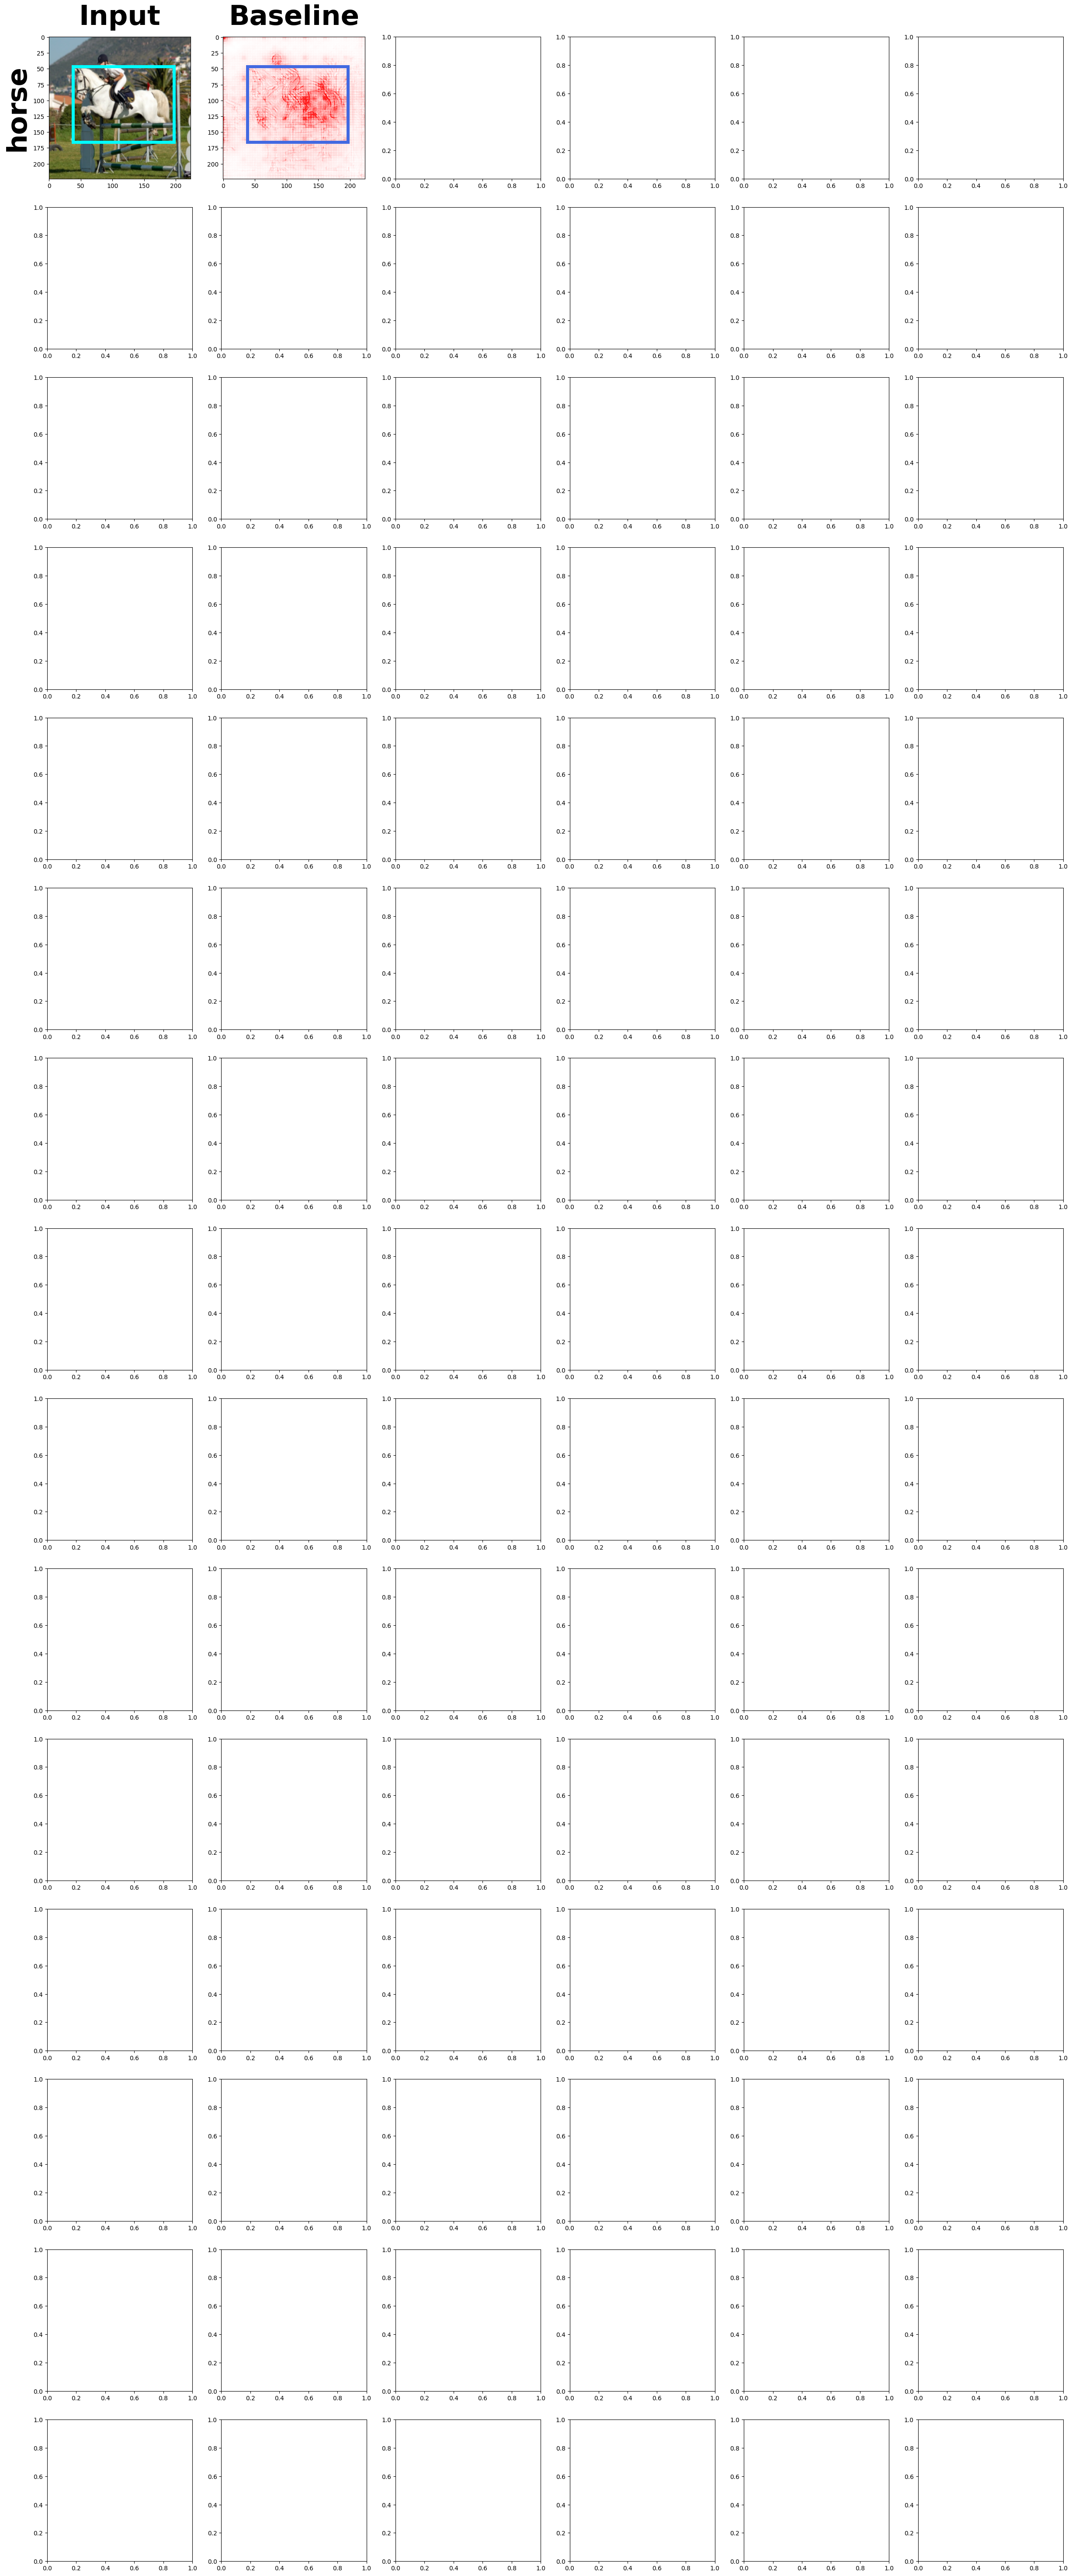

In [ ]:
import torch
torch.cuda.empty_cache()

from visualize import visualize_fig9

visualize_fig9(
    [
        "BASE/VOC2007/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.01_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossPPCE_origmodel_checkpoint_f1_best.pt_resnet50_lr0.001_sll0.001_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossRRR_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll5e-05_layerInput/model_checkpoint_f1_best.pt",
    ],
    last=False,
    show_plot=True
)

BASE\VOC2007/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput\model_checkpoint_f1_best.pt


FileNotFoundError: [Errno 2] No such file or directory: 'BASE\\VOC2007/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput\\model_checkpoint_f1_best.pt'

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

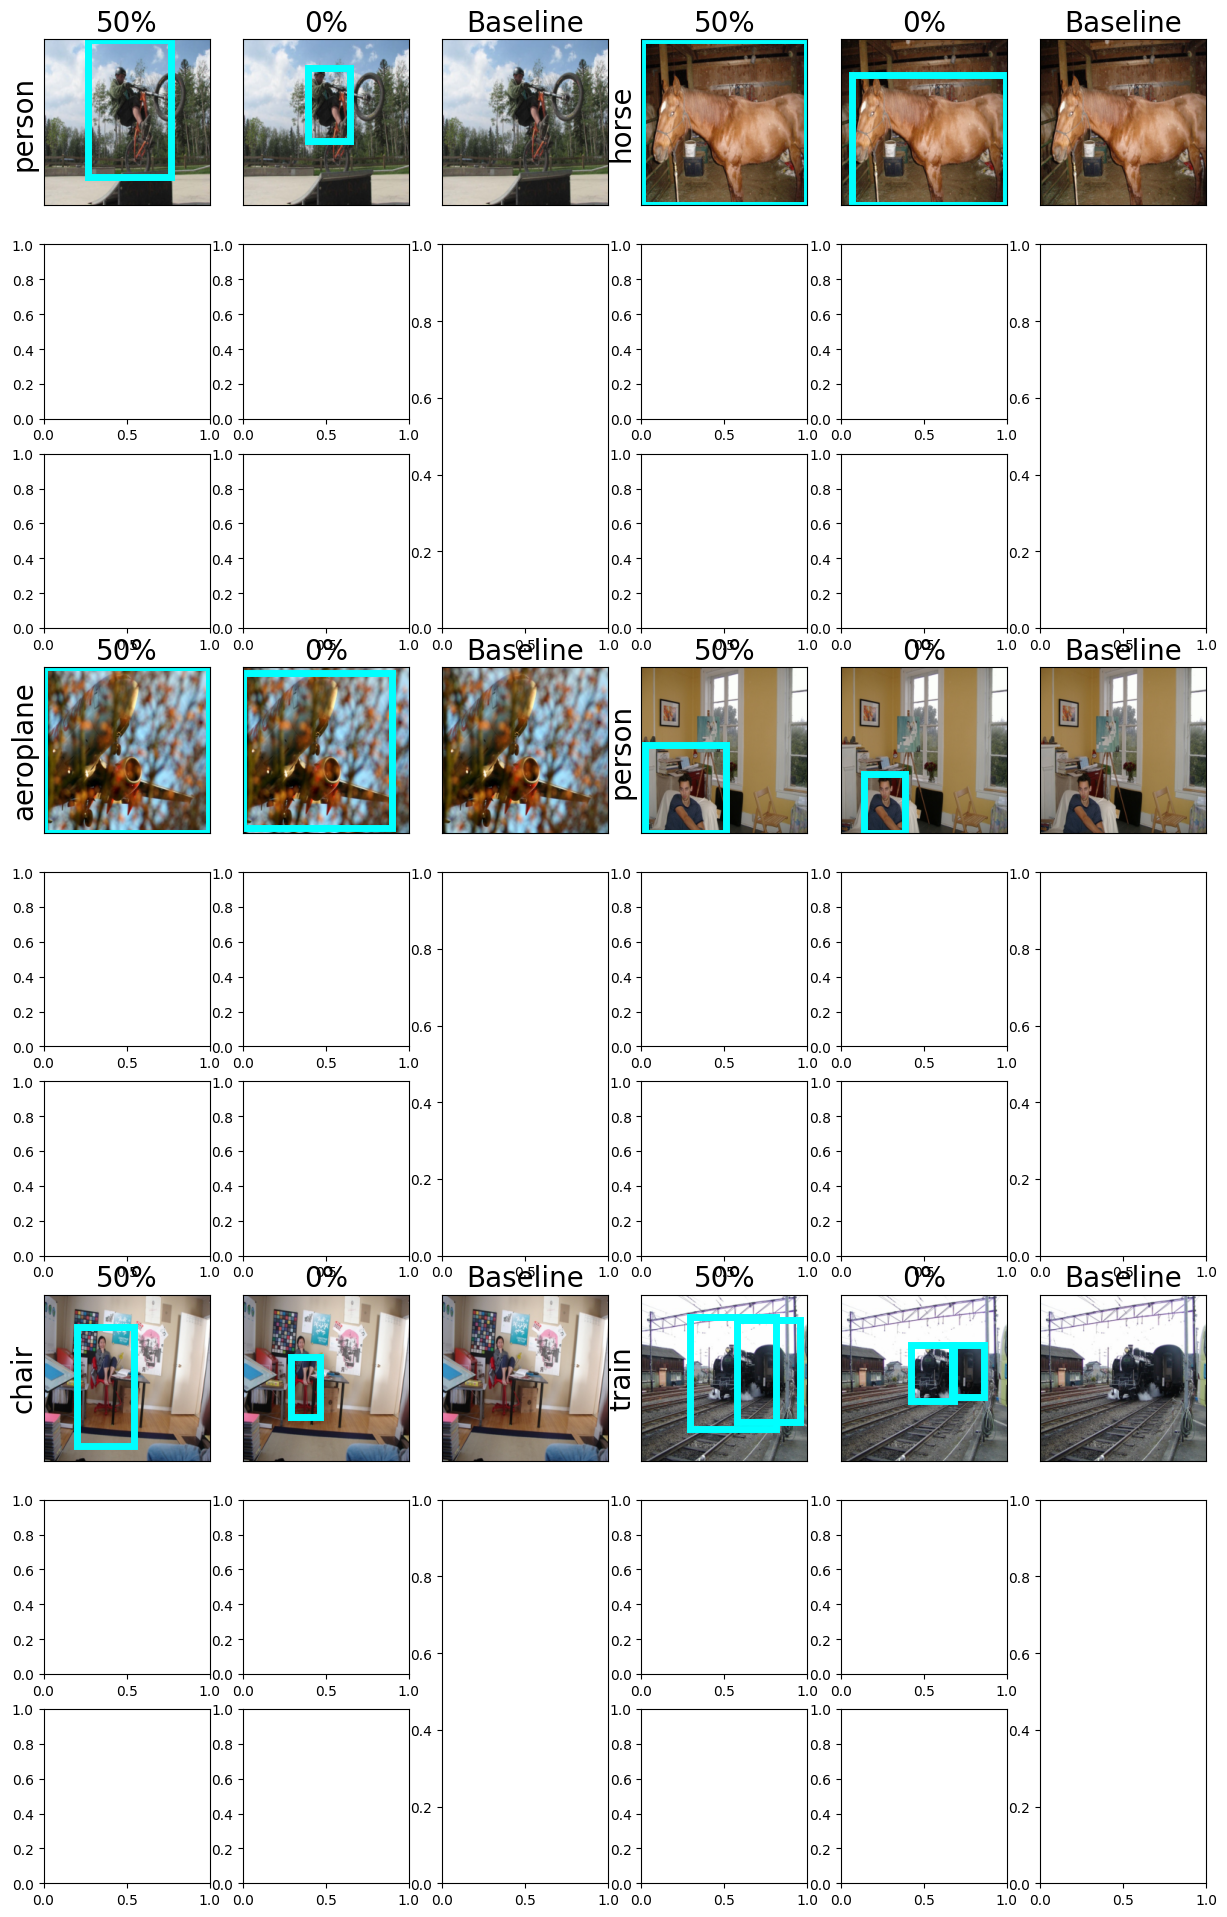

In [ ]:
import torch
torch.cuda.empty_cache()

from visualize import visualize_fig11

visualize_fig11(
    base_path="BASE\VOC2007/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput\model_checkpoint_f1_best.pt",
    energy_paths=[
        "FT\DIL/bcos_finetunedobjlocpareto_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput\model_checkpoint_f1_best.pt",
        "FT\DIL/bcos_FT_dilated_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput_dil0.5\model_checkpoint_f1_best.pt",
    ],
    L1_paths=[
        "FT\DIL/bcos_finetunedobjlocpareto_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput\model_checkpoint_f1_best.pt",
        "FT\DIL/bcos_FT_dilated_attrBCos_loclossL1_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput_dil0.5\model_checkpoint_f1_best.pt",
    ],
    last=False
    )

In [ ]:
# geef een map

# maak een pareto tracker

### 5. Show the evaluation results of the fine-tuned model (Pareto front)

In [ ]:
from utils import *
from visualize import *

root_folder = './p_curves/VOC2007'
data_f1_epg = utils.load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (65, 85)
y_lim_range = (31, 90)
step_size_xticks = 5
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['input']['baseline'],
    energy_data=data_f1_epg['vanilla']['input']['energy'],
    l1_data=data_f1_epg['vanilla']['input']['l1'],
    ppce_data=data_f1_epg['vanilla']['input']['ppce'],
    rrr_data=data_f1_epg['vanilla']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['input']['baseline'],
    energy_data=data_f1_epg['bcos']['input']['energy'],
    l1_data=data_f1_epg['bcos']['input']['l1'],
    ppce_data=data_f1_epg['bcos']['input']['ppce'],
    rrr_data=data_f1_epg['bcos']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['final']['baseline'],
    energy_data=data_f1_epg['vanilla']['final']['energy'],
    l1_data=data_f1_epg['vanilla']['final']['l1'],
    ppce_data=data_f1_epg['vanilla']['final']['ppce'],
    rrr_data=data_f1_epg['vanilla']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=False,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['final']['baseline'],
    energy_data=data_f1_epg['bcos']['final']['energy'],
    l1_data=data_f1_epg['bcos']['final']['l1'],
    ppce_data=data_f1_epg['bcos']['final']['ppce'],
    rrr_data=data_f1_epg['bcos']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=(step_size_yticks),
    hide_x_ticks=False,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")